In [40]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Read data

In [2]:
data = pd.read_csv('data/preprocessed_dataset.csv')

In [3]:
data.head()

,CRGVPERS,BPHIGH4,CHECKUP1,PREGNANT,RCSRLTN2,MEDCOST,CHILDREN,INCOME2,LASTSMK2,VETERAN3,...,PERSDOC2,GENHLTH,CHCKIDNY,HAVARTH3,QLACTLM2,_RACE,PNEUVAC3,_AGEG5YR,MAXVO2_,Cancerlabels
0,NaN,1.0,1.0,NaN,NaN,2.0,88.0,3.0,2.0,2.0,...,1.0,5.0,2.0,1.0,1.0,1.0,1.0,9.0,2469.0,0
1,NaN,3.0,4.0,NaN,NaN,1.0,88.0,1.0,NaN,2.0,...,1.0,3.0,2.0,2.0,1.0,1.0,2.0,7.0,2876.0,0
2,NaN,3.0,1.0,NaN,NaN,2.0,88.0,99.0,NaN,2.0,...,2.0,4.0,2.0,1.0,2.0,1.0,NaN,11.0,2173.0,1
3,NaN,1.0,1.0,NaN,NaN,1.0,1.0,8.0,NaN,2.0,...,2.0,5.0,2.0,1.0,1.0,1.0,1.0,9.0,2469.0,1
4,NaN,3.0,1.0,NaN,NaN,2.0,88.0,77.0,NaN,2.0,...,1.0,5.0,2.0,1.0,2.0,1.0,1.0,9.0,2543.0,0


# XGBoost

In [4]:
# Get labels
labels = data['Cancerlabels']

# Remove labels from dataset
data.drop(['Cancerlabels'], axis=1, inplace=True)

In [6]:
Counter(labels)

Counter({0: 365293, 1: 75964})

In [7]:
# Normalize dataset
scaler = StandardScaler()
data_norm = scaler.fit_transform(data)

In [8]:
# Divide data in training and testing
X_train, X_test, y_train, y_test = train_test_split(data_norm, labels, shuffle=True, test_size=0.2, random_state=42)

In [9]:
# Model training 
model = XGBClassifier(use_label_encoder=False)
model.fit(X_train, y_train)

[18:05:26] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [10]:
# Prediction
y_true, y_pred = y_test, model.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91     72962
           1       0.55      0.10      0.17     15290

    accuracy                           0.83     88252
   macro avg       0.69      0.54      0.54     88252
weighted avg       0.79      0.83      0.78     88252



Accuracy on test data: 0.83
Accuracy on training data: 0.84


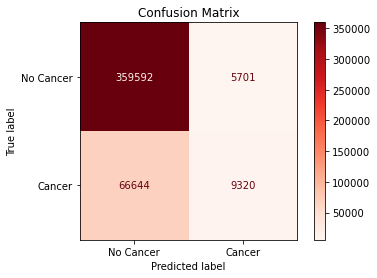

In [12]:
# Confusion matrix 
print("Accuracy on test data: {:.2f}".format(model.score(X_test, y_test)))
print("Accuracy on training data: {:.2f}".format(model.score(X_train, y_train)))
matrix = plot_confusion_matrix(model, data_norm, labels, display_labels=['No Cancer',"Cancer"], cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix')
plt.show()

In [14]:
# Parameters for hyperparameter tuning using GridSearchCV - Check what parameters give the best results
parameters = {'n_estimators':[150, 200, 250, 300], 'max_depth':[5, 6, 7, 8], 'learning_rate':[0.01, 0.02, 0.03]}

In [16]:
# Model training - Adjust Hyperparameters
model = XGBClassifier(use_label_encoder=False, scale_pos_weight=5)
clf = GridSearchCV(model, parameters, scoring='recall')
clf.fit(X_train, y_train)

[18:07:43] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:08:10] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:08:37] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[18:23:37] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:24:09] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:24:42] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[18:42:53] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:43:44] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:44:36] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[19:05:08] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:06:03] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:07:12] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[19:25:03] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:25:45] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:26:28] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[19:41:45] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:42:48] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:43:53] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[20:04:00] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:05:16] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:06:30] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[20:28:33] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:28:58] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:29:24] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[20:42:44] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:43:13] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:43:53] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[21:00:42] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:01:31] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:02:18] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[21:22:46] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:24:02] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:25:21] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=5, subsample=None,
                                     tree_method=None, use_label_encoder=Fal

In [17]:
clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [18]:
# Prediction
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.62      0.75     72962
           1       0.30      0.78      0.44     15290

    accuracy                           0.65     88252
   macro avg       0.62      0.70      0.59     88252
weighted avg       0.82      0.65      0.69     88252



Accuracy on test data: 0.78
Accuracy on training data: 0.79


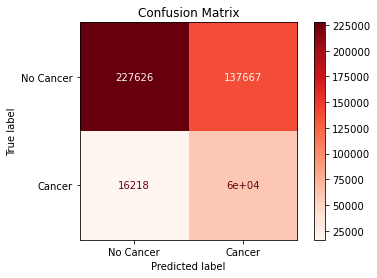

In [19]:
# Confusion matrix 
print("Accuracy on test data: {:.2f}".format(clf.score(X_test, y_test)))
print("Accuracy on training data: {:.2f}".format(clf.score(X_train, y_train)))
matrix = plot_confusion_matrix(clf, data_norm, labels, display_labels=['No Cancer',"Cancer"], cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix')
plt.show()

# Decision Tree

##### As established before, not setting class balance hyperparameter gives poor recall scores, therefore setting class as balanced while hyperparameter tunning can be followed for other models too.

In [20]:
# Filling NaN values with zero because the following tree algorithms can't work with Nan values
df = data.copy()
df = df.fillna(0)

In [21]:
# Normalize dataset
scaler = StandardScaler()
df_norm = scaler.fit_transform(df)

In [22]:
# Divide data in training and testing
X_train, X_test, y_train, y_test = train_test_split(df_norm, labels, shuffle=True, test_size=0.2, random_state=42)

In [23]:
# Parameters for hyperparameter tuning using GridSearchCV - Check what parameters give the best results
parameters = {'splitter':['best', 'random'], 'max_depth':[5, 10, 15, 20, 25], 'criterion':['gini', 'entropy']}

In [24]:
# Model training - Adjust Hyperparameters
model = tree.DecisionTreeClassifier(class_weight="balanced")
clf = GridSearchCV(model, parameters, scoring='recall')
clf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, 25],
                         'splitter': ['best', 'random']},
             scoring='recall')

In [25]:
clf.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=10, splitter='random')

In [26]:
# Prediction
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.61      0.73     72962
           1       0.29      0.78      0.43     15290

    accuracy                           0.64     88252
   macro avg       0.61      0.69      0.58     88252
weighted avg       0.82      0.64      0.68     88252



Accuracy on test data: 0.78
Accuracy on training data: 0.80


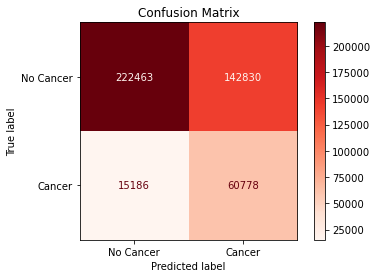

In [27]:
# Confusion matrix 
print("Accuracy on test data: {:.2f}".format(clf.score(X_test, y_test)))
print("Accuracy on training data: {:.2f}".format(clf.score(X_train, y_train)))
matrix = plot_confusion_matrix(clf, df_norm, labels, display_labels=['No Cancer',"Cancer"], cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix')
plt.show()

# Random Forest

In [43]:
# Parameters for hyperparameter tuning using GridSearchCV - Check what parameters give the best results
parameters = {'bootstrap':[True, False], 'max_depth':[5, 10, 15, 20], 'n_estimators':[100, 150, 200]}

In [45]:
# Model training - Adjust Hyperparameters
model = RandomForestClassifier(class_weight="balanced")
display(model.get_params().keys())
clf = RandomizedSearchCV(model, parameters, n_iter = 100, verbose=2, scoring='recall')
clf.fit(X_train, y_train)

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

/Users/poonam/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] n_estimators=100, max_depth=5, bootstrap=True ...................
[CV] .... n_estimators=100, max_depth=5, bootstrap=True, total=  15.6s
[CV] n_estimators=100, max_depth=5, bootstrap=True ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.6s remaining:    0.0s


[CV] .... n_estimators=100, max_depth=5, bootstrap=True, total=  15.3s
[CV] n_estimators=100, max_depth=5, bootstrap=True ...................
[CV] .... n_estimators=100, max_depth=5, bootstrap=True, total=  14.4s
[CV] n_estimators=100, max_depth=5, bootstrap=True ...................
[CV] .... n_estimators=100, max_depth=5, bootstrap=True, total=  15.5s
[CV] n_estimators=100, max_depth=5, bootstrap=True ...................
[CV] .... n_estimators=100, max_depth=5, bootstrap=True, total=  14.8s
[CV] n_estimators=150, max_depth=5, bootstrap=True ...................
[CV] .... n_estimators=150, max_depth=5, bootstrap=True, total=  23.5s
[CV] n_estimators=150, max_depth=5, bootstrap=True ...................
[CV] .... n_estimators=150, max_depth=5, bootstrap=True, total=  21.8s
[CV] n_estimators=150, max_depth=5, bootstrap=True ...................
[CV] .... n_estimators=150, max_depth=5, bootstrap=True, total=  22.1s
[CV] n_estimators=150, max_depth=5, bootstrap=True ...................
[CV] .

[CV] ... n_estimators=200, max_depth=20, bootstrap=True, total= 1.1min
[CV] n_estimators=100, max_depth=5, bootstrap=False ..................
[CV] ... n_estimators=100, max_depth=5, bootstrap=False, total=  20.6s
[CV] n_estimators=100, max_depth=5, bootstrap=False ..................
[CV] ... n_estimators=100, max_depth=5, bootstrap=False, total=  20.6s
[CV] n_estimators=100, max_depth=5, bootstrap=False ..................
[CV] ... n_estimators=100, max_depth=5, bootstrap=False, total=  20.5s
[CV] n_estimators=100, max_depth=5, bootstrap=False ..................
[CV] ... n_estimators=100, max_depth=5, bootstrap=False, total=  20.6s
[CV] n_estimators=100, max_depth=5, bootstrap=False ..................
[CV] ... n_estimators=100, max_depth=5, bootstrap=False, total=  20.6s
[CV] n_estimators=150, max_depth=5, bootstrap=False ..................
[CV] ... n_estimators=150, max_depth=5, bootstrap=False, total=  31.3s
[CV] n_estimators=150, max_depth=5, bootstrap=False ..................
[CV] .

[CV] .. n_estimators=200, max_depth=20, bootstrap=False, total= 1.7min
[CV] n_estimators=200, max_depth=20, bootstrap=False .................
[CV] .. n_estimators=200, max_depth=20, bootstrap=False, total= 1.7min
[CV] n_estimators=200, max_depth=20, bootstrap=False .................
[CV] .. n_estimators=200, max_depth=20, bootstrap=False, total= 1.7min


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 92.4min finished


RandomizedSearchCV(estimator=RandomForestClassifier(class_weight='balanced'),
                   n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20],
                                        'n_estimators': [100, 150, 200]},
                   scoring='recall', verbose=2)

In [46]:
clf.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=5,
                       n_estimators=200)

In [47]:
# Prediction
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.61      0.73     72962
           1       0.30      0.79      0.43     15290

    accuracy                           0.64     88252
   macro avg       0.61      0.70      0.58     88252
weighted avg       0.82      0.64      0.68     88252



Accuracy on test data: 0.79
Accuracy on training data: 0.79


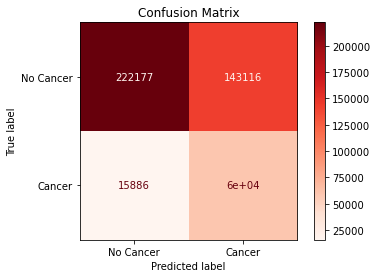

In [48]:
# Confusion matrix 
print("Accuracy on test data: {:.2f}".format(clf.score(X_test, y_test)))
print("Accuracy on training data: {:.2f}".format(clf.score(X_train, y_train)))
matrix = plot_confusion_matrix(clf, df_norm, labels, display_labels=['No Cancer',"Cancer"], cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix')
plt.show()

 # Logistic Regression

In [30]:
# Parameters for hyperparameter tuning using GridSearchCV - Check what parameters give the best results
parameters = {'max_iter':[100, 150, 200]}

In [31]:
# Model training - Adjust Hyperparameters
model = LogisticRegression(class_weight="balanced")
clf = GridSearchCV(model, parameters, scoring='recall')
clf.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'max_iter': [100, 150, 200]}, scoring='recall')

In [32]:
clf.best_estimator_

LogisticRegression(class_weight='balanced')

In [33]:
# Prediction
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.65      0.76     72962
           1       0.31      0.74      0.44     15290

    accuracy                           0.67     88252
   macro avg       0.62      0.70      0.60     88252
weighted avg       0.82      0.67      0.71     88252



Accuracy on test data: 0.74
Accuracy on training data: 0.75


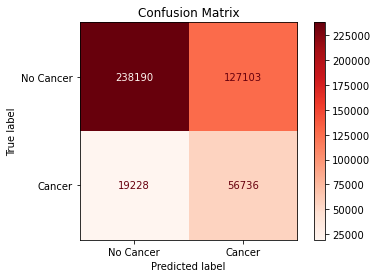

In [34]:
# Confusion matrix 
print("Accuracy on test data: {:.2f}".format(clf.score(X_test, y_test)))
print("Accuracy on training data: {:.2f}".format(clf.score(X_train, y_train)))
matrix = plot_confusion_matrix(clf, df_norm, labels, display_labels=['No Cancer',"Cancer"], cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix')
plt.show()

# Gaussian Naive Bayes

#### This algorithm does not have a hyperparameter for class balancing, so these results are skewed.

In [37]:
# Model training 
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [38]:
# Prediction
y_true, y_pred = y_test, model.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.59      0.72     72962
           1       0.28      0.75      0.40     15290

    accuracy                           0.62     88252
   macro avg       0.60      0.67      0.56     88252
weighted avg       0.81      0.62      0.66     88252



Accuracy on test data: 0.62
Accuracy on training data: 0.62


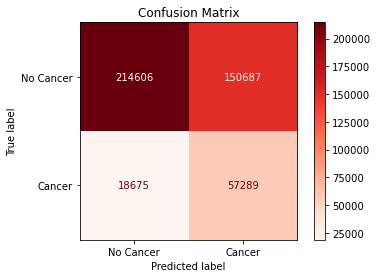

In [39]:
# Confusion matrix 
print("Accuracy on test data: {:.2f}".format(model.score(X_test, y_test)))
print("Accuracy on training data: {:.2f}".format(model.score(X_train, y_train)))
matrix = plot_confusion_matrix(model, df_norm, labels, display_labels=['No Cancer',"Cancer"], cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix')
plt.show()